In [11]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
file_path = '/content/drive/MyDrive/ML/A5/titanic_train.csv'
df = pd.read_csv(file_path)
df.head()

Mounted at /content/drive


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Drop unwanted data

In [12]:
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

Convert categorical features to integers

In [13]:
df['Sex'] = pd.factorize(df['Sex'])[0]
df['Embarked'] = pd.factorize(df['Embarked'])[0]

Handle missing values

In [14]:
# Assuming 'Age' might have NaN values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

Apply PCA and visualize the explained variance

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('dark_background')

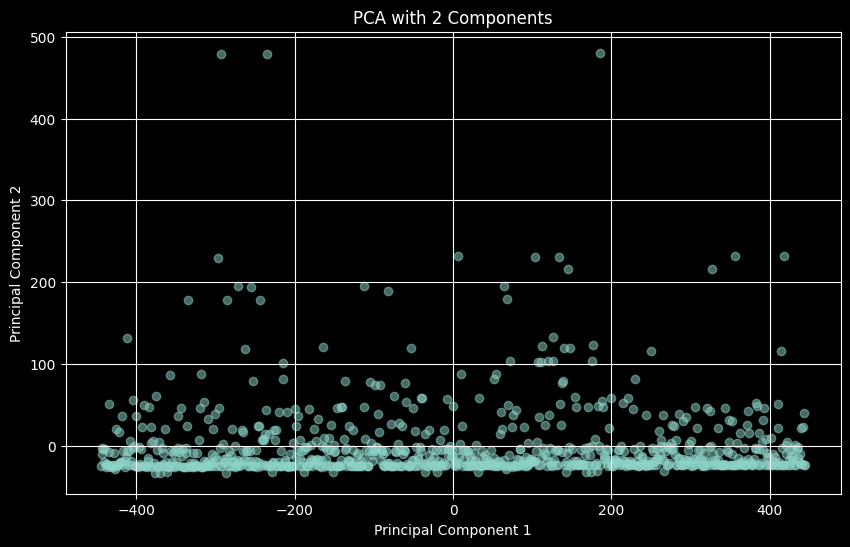

Explained variance ratio for 2 components: [0.96164308 0.03587754]


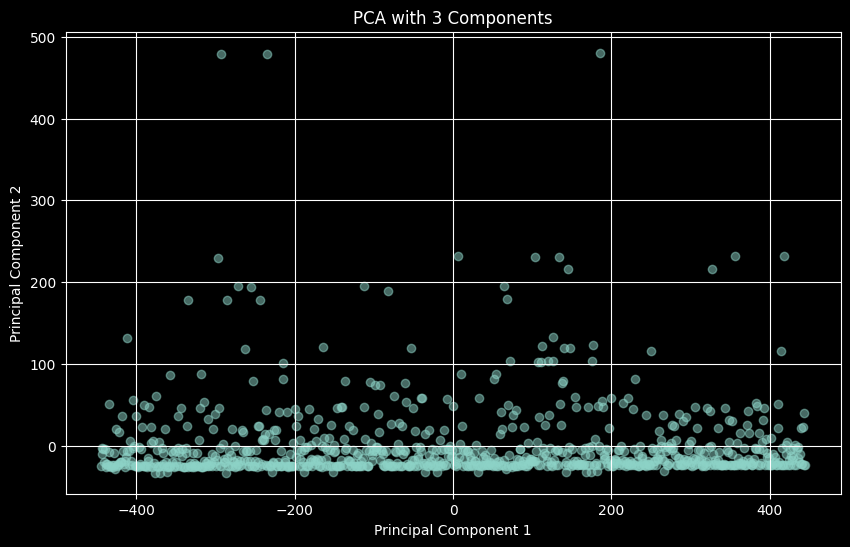

Explained variance ratio for 3 components: [0.96164308 0.03587754 0.00243621]


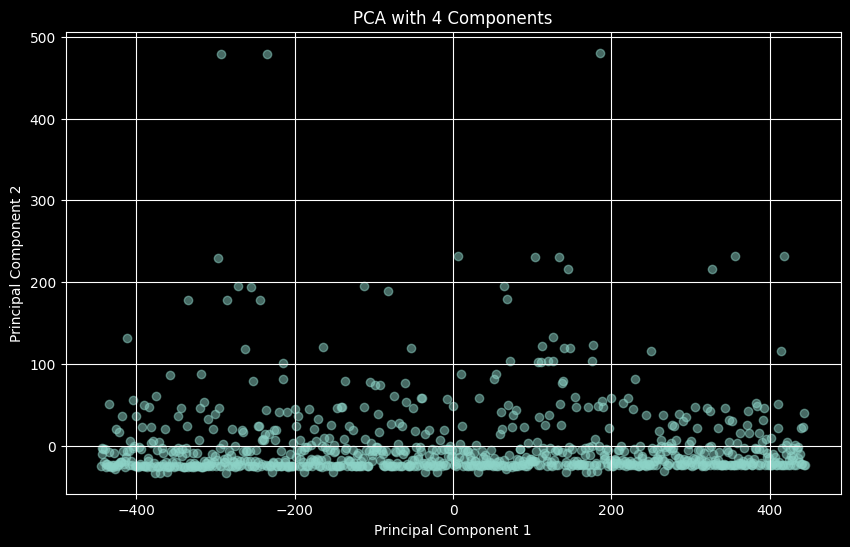

Explained variance ratio for 4 components: [9.61643078e-01 3.58775448e-02 2.43621482e-03 1.83381703e-05]


In [18]:
# Create PCA objects for 2, 3, and 4 components
pca_components = [2, 3, 4]
explained_variances = []

for components in pca_components:
    pca = PCA(n_components=components)
    pca.fit(df)
    explained_variances.append(pca.explained_variance_ratio_)
    principal_components = pca.transform(df)

    # Plotting the principal components to visualize
    plt.figure(figsize=(10, 6))
    plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
    plt.title(f'PCA with {components} Components')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()

    # Print explained variance ratio
    print(f"Explained variance ratio for {components} components:", pca.explained_variance_ratio_)

Checking indexes

In [22]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import DBSCAN

# Assume df is your preprocessed DataFrame
X = df

# Applying PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)


print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance ratio:", pca.explained_variance_ratio_.cumsum())

Explained variance ratio: [9.61643078e-01 3.58775448e-02 2.43621482e-03 1.83381703e-05]
Cumulative explained variance ratio: [0.96164308 0.99752062 0.99995684 0.99997518]


Symmary from what I undesrtood:
1. The first principal component is significantly dominant, indicating that it alone almost fully captures the information carried by the original features. This suggests a high correlation among the original features, meaning they mostly vary together.
2. Given the high percentage of explained variance by the first component, we could consider using just the first one or two components for further analysis, such as clustering, as they contain most of the information of the entire dataset.
3. The additional components contribute very little to the understanding of data variance, so including more than two components might not provide substantial benefits for further data analysis tasks unless minute details are critical.

DBSCAN clustering on two principal components

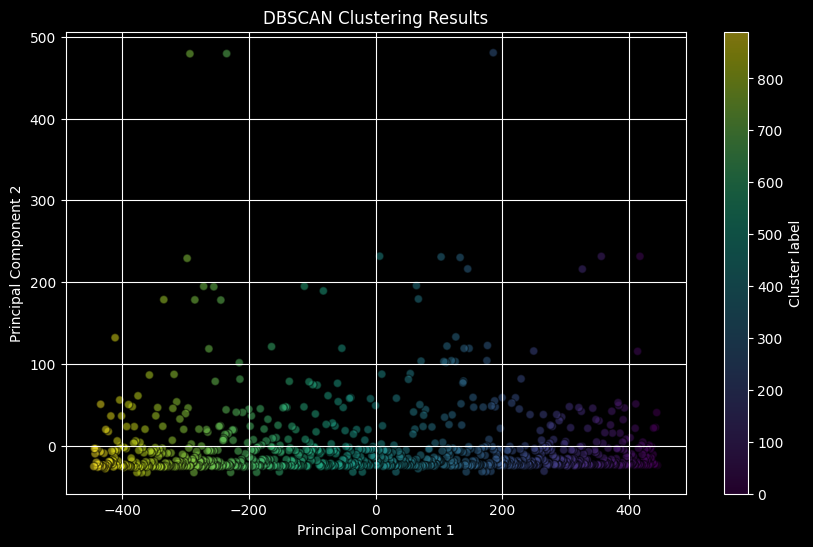

In [34]:
from sklearn.cluster import DBSCAN

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=1)
clusters = dbscan.fit_predict(X_pca)

# Plot DBSCAN results
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.5, edgecolor='k')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster label')
plt.grid(True)
plt.show()


Parameters Impact: Setting min_samples to 1 and eps to 0.5 has allowed the algorithm to form clusters even from very sparse data points, which has reduced the noise significantly.